<h1><center> DM ASSIGNEMNT (Attrition) </center></h1>

Process involved in Data Mining:
    1. Understanding requirements:
        a) Business Understanding
        b) Data Understanding
    2. Preparing Data
    3. Building Model
    4. Applying the model
    5. Evaluating Model
    6. Deployment

1. Understanding requirements:<br>

    1.a) Business Requirements:
         Aim:
          The aim of this exercise is to "Analyze and Build models for Predicting (Employee) Attrition".
          
         Problem to be solved:
          Given the data set predit whether an amployee will leave teh prganization or not based on the give attributes
        
    1.b) Data Understanding:<br>
          Here as part of Understanding the data, we perform following steps:
          1.b.i) Asses the data Size
          1.b.ii) Understand the type of attributes
          1.b.iii) Data Processing
              1.b.iii.a) Data PreProcessing, Finding missing inconsistent data
              
            

<label>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</label>

<h3>0) Reading the data set</h3>
The following code reads the given data set from 'Attrition.csv' file and reads the data set.

<h5>a) Reading the data set and consoling the top two rows</h5>

In [201]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from prettytable import PrettyTable

df = pd.read_csv('Attrition.csv')
df.head(2)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7


In [200]:
pip install -U prettytable

<label>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</label>

<h3>1) Understanding requirements:</h3>
<h4 style="padding-left: 10px">a) Business Requirements Understanding:</h4><br>
<strong style="padding-left: 30px">Aim:</strong><br>
<span style="padding-left: 30px">The aim of this exercise is to "Analyze and Build models for Predicting (Employee) Attrition".</span>

<strong style="padding-left: 30px">Problem to be solved:</strong><br>
<span style="padding-left: 30px">Given the data set predit whether an amployee will leave teh prganization or not based on the give attributes</span>

<h4 style="padding-left: 10px">a) Data Understanding:</h4>
<span style="padding-left: 30px">Data Understanding has the following steps being taken<br></span>
<span style="padding-left: 30px">a) Assesing the Size of dataset<br></span>
<span style="padding-left: 30px">b) Getting attributes and their types<br></span>
<span style="padding-left: 30px">c) Filtering out the Qualitative attributes<br></span>
<span style="padding-left: 30px">d) Getting quantative attributes<br></span>
<span style="padding-left: 30px">Balanced or imbalanced dataset</span>


<h5>a) Assesing the Size of dataset (rows x columns)</h5>

In [5]:
df.shape

(1470, 33)

<h5>b) Getting attributes and their types</h5>

In [6]:
df.dtypes

Attrition                   object
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome            object
Education                   object
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                  object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome               object
MonthlyRate                 object
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

<h5>c) Filtering out the Qualitative attributes</h5>
Pandas "df.dtypes" if is an "object" means it has string values, hence these can be classified as Qualitative attributes

In [7]:
# Creating a copy of dataset
dfCopy = df.copy()

# Replace the NAN with python NaN
dfCopy.replace("NAN", np.NaN,inplace=True)

# Dropping the NaN values for analysis using pandas dropna()
dfCopy.dropna (inplace = True)

qualitative_features = [feature for feature in dfCopy.columns if dfCopy[feature].dtypes == 'object']
print("Qualitiative Features: ", len(qualitative_features))
print(qualitative_features)
print('----------------------------------------')

for column in qualitative_features:

        # Lists all coloumns and unique value in them
        print(str(column) + ' : ' + str(dfCopy[column].unique()))

        # Diplays count of each value of the column
        print(dfCopy[column].value_counts())

        print("_________________________________________________________________")

Qualitiative Features:  14
['Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'HourlyRate', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'Over18', 'OverTime']
----------------------------------------
Attrition : ['Yes' 'No']
No     1214
Yes     235
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1027
Travel_Frequently     274
Non-Travel            148
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    948
Sales                     438
Human Resources            63
Name: Department, dtype: int64
_________________________________________________________________
DistanceFromHome : ['1' '8' '2' '3' '24' '23' '16' '15' '26' '19' '21' '5' '11' '9' 

<strong>Explanation:</strong><br>
The Qualitative data types are as follows. There are total 14 attributes that fall under the this category. We extracted them based on the datatype assigned by pandas library as 'object'. Hence, these can be categorical, discrete, binary etc type of data<br>
<table style="border: 1px solid; width: 100%">
    <tr>
        <td style="text-align: left; border: 1px solid">'Attrition'</td>
        <td style="text-align: left; border: 1px solid">'BusinessTravel'</td>
        <td style="text-align: left; border: 1px solid">'Department'</td>
        <td style="text-align: left; border: 1px solid">'DistanceFromHome'</td>
        <td style="text-align: left; border: 1px solid">'Education'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'EducationField'</td>
        <td style="text-align: left; border: 1px solid">'Gender'</td>
        <td style="text-align: left; border: 1px solid">'HourlyRate'</td>
        <td style="text-align: left; border: 1px solid">'JobRole'</td>
        <td style="text-align: left; border: 1px solid">'MaritalStatus'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'MonthlyIncome'</td>
        <td style="text-align: left; border: 1px solid">'MonthlyRate'</td>
        <td style="text-align: left; border: 1px solid">'Over18'</td>
        <td style="text-align: left; border: 1px solid">'OverTime'</td>
    </tr>
</table>

<h5>c) Getting quantative attributes</h5><br>

In [8]:
quantitaive_features = [feature for feature in dfCopy.columns if dfCopy[feature].dtypes == 'int64']

print("Quantitative Features: ", len(quantitaive_features))
print(quantitaive_features)
print("-----------------------------------")

for column in quantitaive_features:

        # Lists all coloumns and unique value in them
        print(str(column) + ' : ' + str(dfCopy[column].unique()))

        # Diplays count of each value of the column
        print(dfCopy[column].value_counts())

        print("_________________________________________________________________")

Quantitative Features:  19
['Age', 'DailyRate', 'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
-----------------------------------
Age : [41 49 37 33 27 32 59 30 38 35 29 31 34 28 22 53 24 36 21 42 44 46 43 50
 26 48 55 45 56 23 51 40 54 58 20 25 19 39 57 52 47 18 60]
35    78
34    74
31    69
29    67
36    67
32    61
30    60
33    58
40    57
38    57
37    49
28    48
27    47
42    46
39    41
45    40
41    40
26    38
46    33
44    33
43    31
50    29
24    26
25    25
49    24
47    23
55    22
51    19
53    19
52    18
54    18
48    18
22    15
56    14
58    14
23    13
21    12
20    11
59    10
19     8
18     8
60     5
57     4
Name: Age, dtype: int64
_____

<strong>Explanation:</strong><br>
The Qaunitative data types are as follows. There are total 19 attributes that fall under the quanititaive category. We extracted them based on their datatype assigned by pandas library as 'int64'.<br>
<table style="border: 1px solid; width: 100%">
    <tr>
        <td style="text-align: left; border: 1px solid">'Age'</td>
        <td style="text-align: left; border: 1px solid">'DailyRate'</td>
        <td style="text-align: left; border: 1px solid">'EmployeeNumber'</td>
        <td style="text-align: left; border: 1px solid">'EnvironmentSatisfaction'</td>
        <td style="text-align: left; border: 1px solid">'JobInvolvement'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'JobLevel'</td>
        <td style="text-align: left; border: 1px solid">'JobSatisfaction'</td>
        <td style="text-align: left; border: 1px solid">'NumCompaniesWorked'</td>
        <td style="text-align: left; border: 1px solid">'PercentSalaryHike'</td>
        <td style="text-align: left; border: 1px solid">'PerformanceRating'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'RelationshipSatisfaction'</td>
        <td style="text-align: left; border: 1px solid">'StockOptionLevel'</td>
        <td style="text-align: left; border: 1px solid">'TotalWorkingYears'</td>
        <td style="text-align: left; border: 1px solid">'TrainingTimesLastYear'</td>
        <td style="text-align: left; border: 1px solid">'WorkLifeBalance'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'YearsAtCompany'</td>
        <td style="text-align: left; border: 1px solid">'YearsInCurrentRole'</td>
        <td style="text-align: left; border: 1px solid">'YearsSinceLastPromotion'</td>
        <td style="text-align: left; border: 1px solid">'YearsWithCurrManager'</td>
    </tr>
</table>

In [9]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="FilesForNotebook/Qualitative_attributes.png")

In [10]:
Image(url="FilesForNotebook/Quantitative_attributes.png")

<label>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</label>

<h3>2) Preparing Data</h3>

<h5 style="padding-left: 15px">a) Identifying Missing Data, Inconsistent Data</h5>
<span style="padding-left: 30px">Looking at the data set we can find Data set contains NAN, this step aims to figure the amount of Missing Data we are having in the data set</span>

In [11]:
# Creating a copy of dataset
dfCopy = df.copy()

# Replace the NAN with python NaN
dfCopy.replace("NAN", np.NaN,inplace=True)

totalRows = len(dfCopy.index);

for column in dfCopy:

        # Lists all coloumns and unique value in them
        if (dfCopy[column].isna().sum()) :
            print(str(column))
            print('    NAN count: ' + str(dfCopy[column].isna().sum()))
            print('    NAN ratio: ' + str(round((dfCopy[column].isna().sum() / totalRows), 3)))
            print('')



DistanceFromHome
    NAN count: 5
    NAN ratio: 0.003

Education
    NAN count: 1
    NAN ratio: 0.001

HourlyRate
    NAN count: 5
    NAN ratio: 0.003

MonthlyIncome
    NAN count: 5
    NAN ratio: 0.003

MonthlyRate
    NAN count: 5
    NAN ratio: 0.003



<strong>Analysis:</strong><br>
<label>From the above analysis we find that the "NAN" count is lesser than 1% for the data set, hence we can:</label>
<ol>
    <li>Drop the NAN records</li>
    <li>Fill the NAN values with the mean, mode or median value, but this needs further analysis on data distribution</li>
    <li>Use most probable value to fill in</li>
</ol>


<label>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</label>

<h3>2.1) Analyzing Data</h3>

We will now try to analyse the distribution of the data in following ways:<br>
1) Categorical Data -- Count Plot / Pie charts<br>
2) Continuous Data -- Histogram distribution

<strong>Note:</strong><br>
We will not be plotting for the "EmployeeNumber" as it is an id, it hardly contributes anything for the decision making 

<h5 style="padding-left: 15px">1) Count Plots (for categorical attributes)</h5>

Following attributes belong to the Categorical type in the broad aspect:

<table style="border: 1px solid; width: 100%; font-size: 1.3rem">
    <tr>
        <td style="text-align: left; border: 1px solid">'Attrition'</td>
        <td style="text-align: left; border: 1px solid">'BusinessTravel'</td>
        <td style="text-align: left; border: 1px solid">'Department'</td>
        <td style="text-align: left; border: 1px solid">'Education'</td>
        <td style="text-align: left; border: 1px solid">'EducationField'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'Gender'</td>
        <td style="text-align: left; border: 1px solid">'JobRole'</td>
        <td style="text-align: left; border: 1px solid">'MaritalStatus'</td>
        <td style="text-align: left; border: 1px solid">'Over18'</td>
        <td style="text-align: left; border: 1px solid">'OverTime'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'EnvironmentSatisfaction'</td>
        <td style="text-align: left; border: 1px solid">'JobInvolvement'</td>
        <td style="text-align: left; border: 1px solid">'JobLevel'</td>
        <td style="text-align: left; border: 1px solid">'JobSatisfaction'</td>
        <td style="text-align: left; border: 1px solid">'NumCompaniesWorked'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'PercentSalaryHike'</td>
        <td style="text-align: left; border: 1px solid">'PerformanceRating'</td>
        <td style="text-align: left; border: 1px solid">'RelationshipSatisfaction'</td>
        <td style="text-align: left; border: 1px solid">'StockOptionLevel'</td>
        <td style="text-align: left; border: 1px solid">'TrainingTimesLastYear'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'WorkLifeBalance'</td>
    </tr>
</table>

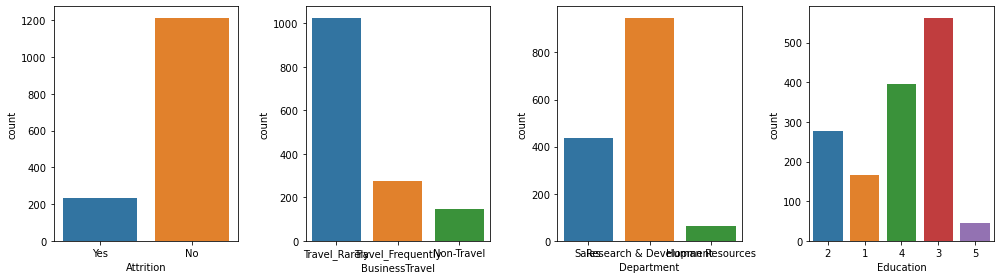

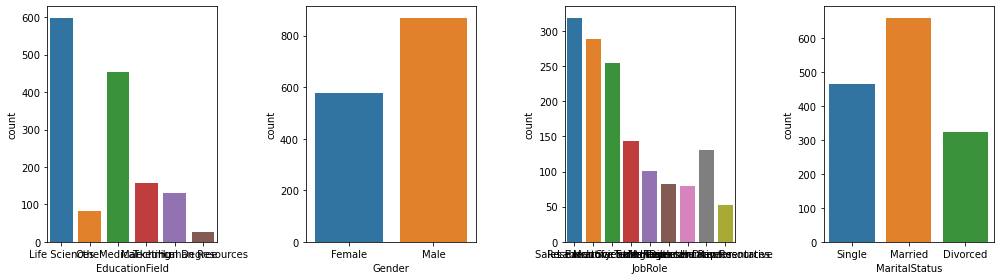

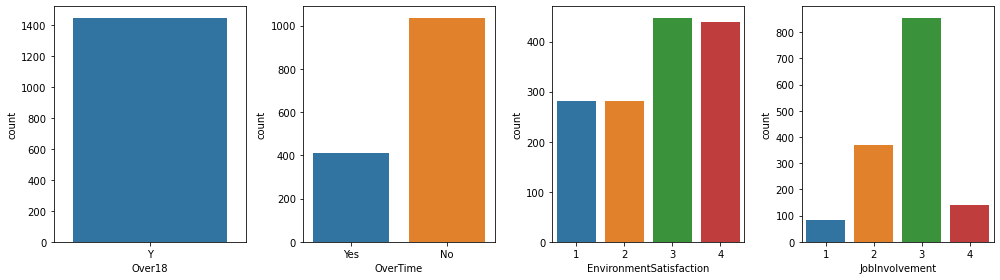

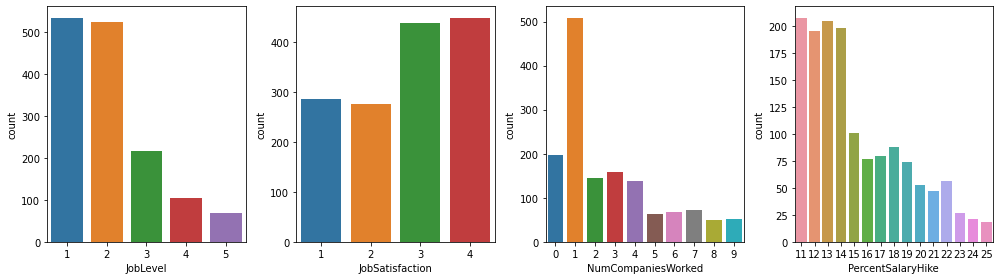

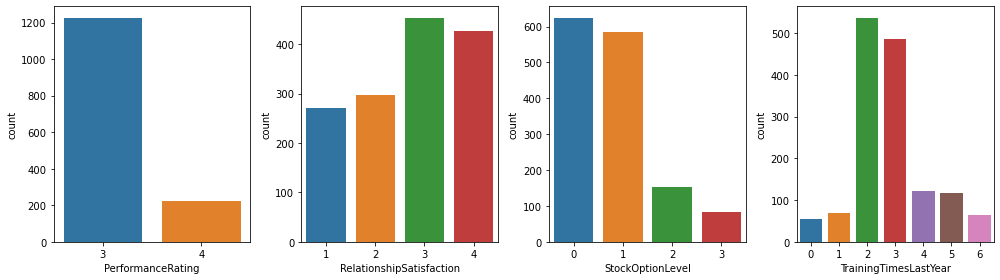

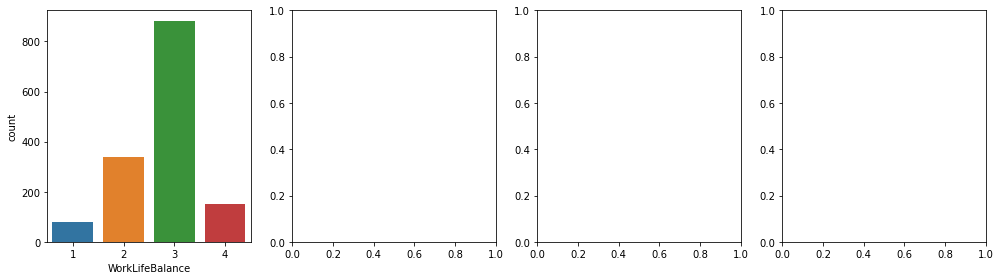

In [12]:
# Creating a copy of dataset
dfAnalytic = df.copy()

# Replace the NAN with python NaN
dfAnalytic.replace("NAN", np.NaN,inplace=True)

# Dropping the NaN values for analysis using pandas dropna()
dfAnalytic.dropna (inplace = True)

plt.rcParams["figure.figsize"] = [14.00, 4.0]
plt.rcParams["figure.autolayout"] = True

categoricalAttr = ['Attrition','BusinessTravel','Department','Education',
                   'EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime',
                   'EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','NumCompaniesWorked',
                   'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel',
                   'TrainingTimesLastYear','WorkLifeBalance']

index = 0
graphsInARow = 4

for attr in categoricalAttr:
    
    if (index % graphsInARow == 0):
        f, ax = plt.subplots(1, graphsInARow)
        
    sns.countplot(x=attr, data=dfAnalytic, ax = ax[index % graphsInARow])
    index = index + 1
    
    if (index % graphsInARow == 0):
        plt.show()



<h5 style="padding-left: 15px">2) Histogram Distribution (for Continuous Attributes)</h5>

Hostogram plot is best suited to understand the spread for continuous data. Following attributes belong to the continuous type in the broad aspect:
<table style="border: 1px solid; width: 100%; font-size: 1.3rem">
    <tr>
        <td style="text-align: left; border: 1px solid">'DistanceFromHome'</td>
        <td style="text-align: left; border: 1px solid">'HourlyRate'</td>
        <td style="text-align: left; border: 1px solid">'MonthlyIncome'</td>
        <td style="text-align: left; border: 1px solid">'MonthlyRate'</td>
        <td style="text-align: left; border: 1px solid">'Age'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'DailyRate'</td>
        <td style="text-align: left; border: 1px solid">'TotalWorkingYears'</td>
        <td style="text-align: left; border: 1px solid">'YearsAtCompany'</td>
        <td style="text-align: left; border: 1px solid">'YearsInCurrentRole'</td>
        <td style="text-align: left; border: 1px solid">'YearsSinceLastPromotion'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'YearsWithCurrManager'</td>
    </tr>
</table>

C:\Users\685239\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\685239\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\685239\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

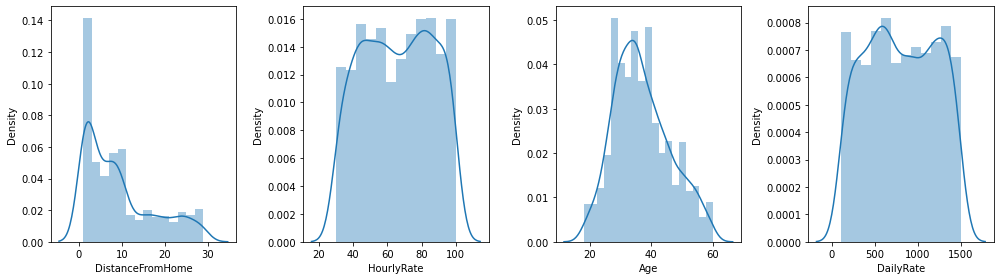

C:\Users\685239\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\685239\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\685239\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

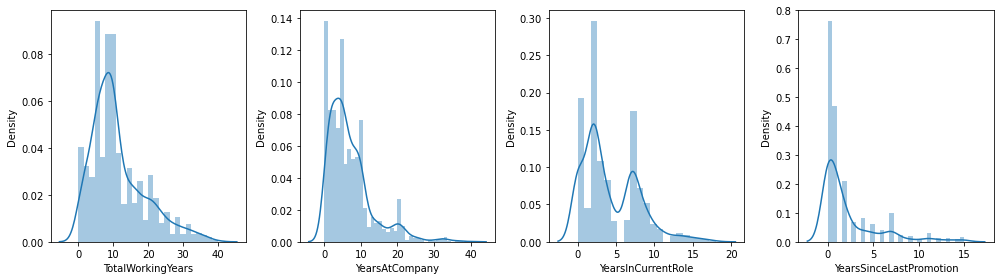

C:\Users\685239\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


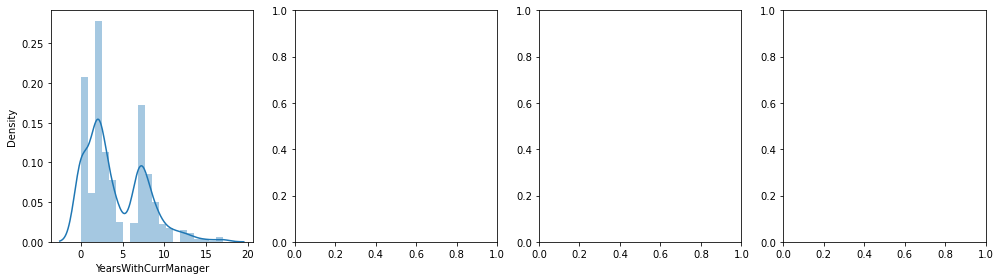

In [209]:
plt.rcParams["figure.figsize"] = [14.00, 4.0]
plt.rcParams["figure.autolayout"] = True

# continuosAttr = ['DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','Age','DailyRate','TotalWorkingYears',
#                  'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

continuosAttr = ['DistanceFromHome','HourlyRate','Age','DailyRate','TotalWorkingYears','YearsAtCompany',
                 'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

index = 0
graphsInARow = 4

# MonthlyIncome MonthlyRate

for attr in continuosAttr:
    if (index % graphsInARow == 0):
        f, ax = plt.subplots(1, graphsInARow)
#     sns.histplot(data=dfAnalytic[attr], bins=10, ax = ax[index % graphsInARow])
    sns.distplot(dfAnalytic[attr], ax = ax[index % graphsInARow])
    index = index + 1
    if (index % graphsInARow == 0):
        plt.show()


<h3>2.2) Doing Correlation Analysis</h3>

<h5 style="padding-left: 15px">1) Constructing correlation matrix</h5>

In [41]:
dfAnalytic.corr()

,Age,DailyRate,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.018595,-0.016191,0.013120,0.031520,0.508991,-0.008046,0.299032,0.011358,0.004064,0.050937,0.036041,0.678570,-0.017556,-0.023454,0.306970,0.211695,0.212149,0.197801
DailyRate,0.018595,1.000000,-0.046025,0.018045,0.044653,0.005182,0.034205,0.037415,0.020069,0.001524,0.005784,0.041631,0.015937,0.000367,-0.034566,-0.032436,0.012727,-0.032000,-0.026304
EmployeeNumber,-0.016191,-0.046025,1.000000,0.021356,-0.007447,-0.022431,-0.041935,0.000426,-0.012135,-0.022069,-0.072962,0.065589,-0.015461,0.023532,0.011379,-0.013417,-0.010080,-0.004685,-0.010925
EnvironmentSatisfaction,0.013120,0.018045,0.021356,1.000000,-0.009120,0.004166,-0.010455,0.010154,-0.034895,-0.033485,0.010273,0.010760,0.000408,-0.020474,0.027877,0.004598,0.018866,0.018088,-0.005381
JobInvolvement,0.031520,0.044653,-0.007447,-0.009120,1.000000,-0.010022,-0.017527,0.016611,-0.018978,-0.034795,0.036767,0.019357,-0.004773,-0.016096,-0.013510,-0.020052,0.011913,-0.023461,0.026058
JobLevel,0.508991,0.005182,-0.022431,0.004166,-0.010022,1.000000,-0.001137,0.143753,-0.030713,-0.017286,0.019000,0.014226,0.783502,-0.018009,0.038183,0.533061,0.389610,0.352281,0.375622
JobSatisfaction,-0.008046,0.034205,-0.041935,-0.010455,-0.017527,-0.001137,1.000000,-0.059695,0.023218,0.005444,-0.013921,0.012179,-0.020395,-0.007209,-0.019071,-0.002513,-0.004101,-0.021603,-0.030543
NumCompaniesWorked,0.299032,0.037415,0.000426,0.010154,0.016611,0.143753,-0.059695,1.000000,-0.012008,-0.017609,0.054743,0.027594,0.236563,-0.063706,-0.007538,-0.118707,-0.090124,-0.036409,-0.111084
PercentSalaryHike,0.011358,0.020069,-0.012135,-0.034895,-0.018978,-0.030713,0.023218,-0.012008,1.000000,0.774250,-0.033223,0.007584,-0.014143,-0.005311,-0.001820,-0.028128,0.002248,-0.010188,-0.006360
PerformanceRating,0.004064,0.001524,-0.022069,-0.033485,-0.034795,-0.017286,0.005444,-0.017609,0.774250,1.000000,-0.027628,0.003199,0.009932,-0.015690,0.003150,0.008032,0.038384,0.024760,0.026655


<h5 style="padding-left: 15px">2) Constructing Heat Mapp off the correlation</h5>

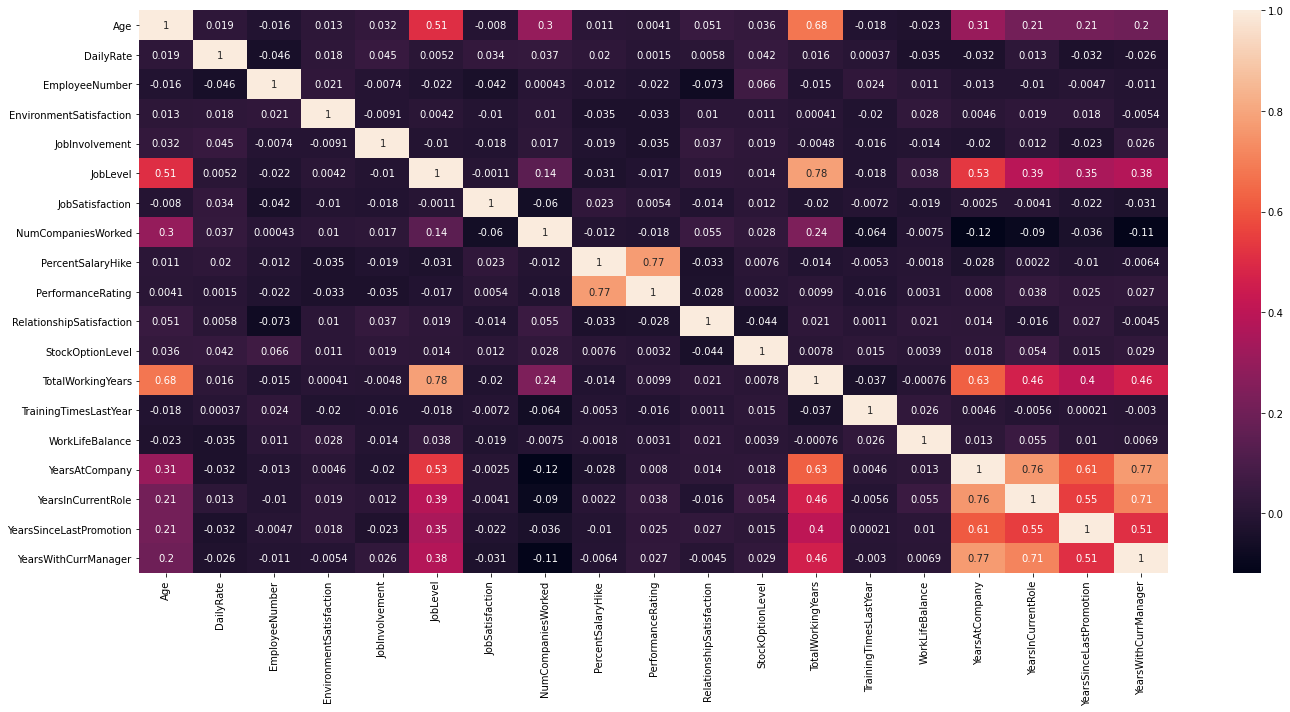

In [46]:
# Picturing attribute correlation
plt.figure(figsize=(20,10))  #14in by 14in
sns.heatmap(dfAnalytic.corr(), annot=True)

<h3>3) Building the Model</h3>

<h5>a) Converting categorical attributes to numeric values </h5>

In [50]:
# Creating a copy of dataset
dfModel = df.copy()

# Replace the NAN with python NaN
dfModel.replace("NAN", np.NaN,inplace=True)

# Dropping the NaN values for analysis using pandas dropna()
dfModel.dropna (inplace = True)

#Transform discrete/categorical attributes into numerical columns
from sklearn.preprocessing import LabelEncoder

for attribute in dfModel.columns:
        if dfModel[attribute].dtype == np.number:
            continue
        dfModel[attribute] = LabelEncoder().fit_transform(dfModel[attribute])

# Display the data
dfModel

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,23,2,617,2,0,1,1,0,1,...,0,0,0,8,0,0,6,4,0,5
1,0,31,1,111,1,27,0,1,1,2,...,1,3,1,10,3,2,10,7,1,7
2,1,19,2,796,1,11,1,4,2,3,...,0,1,0,7,3,2,0,0,0,0
3,0,15,1,811,1,22,3,1,3,3,...,0,2,0,8,3,2,8,7,3,0
4,0,9,2,310,1,11,0,3,4,0,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,18,1,490,1,15,1,3,1444,2,...,0,2,1,17,3,2,5,2,0,3
1466,0,21,2,325,1,25,0,3,1445,3,...,0,0,1,9,5,2,7,7,1,7
1467,0,9,2,39,1,23,2,1,1446,1,...,1,1,1,6,0,2,6,2,0,3
1468,0,31,1,573,2,11,2,3,1447,3,...,0,3,0,17,3,1,9,6,0,8


<strong>Explanation:</strong><br>
1) We have the target attribute at the begining of the dataset<br>
2) We can see all the categorical variables are now converted to numeric type to help build model easily

<h5>b) Splitting VERTICALLY into Pedictor and non-predictor attributes for training the model</h5>

In [186]:
X = dfModel.iloc[:, 1:dfModel.shape[1]].values 
Y = dfModel.iloc[:, 0].values

print("List of other attribute (INPUT ATTRIBUTE) values: ")
print(X)
print("--------------------------------------")
print("List of outcome (OUTPUT ATTRIBUTE) value: ")
print(Y)
print("--------------------------------------")

List of other attribute (INPUT ATTRIBUTE) values: 
[[ 23   2 617 ...   4   0   5]
 [ 31   1 111 ...   7   1   7]
 [ 19   2 796 ...   0   0   0]
 ...
 [  9   2  39 ...   2   0   3]
 [ 31   1 573 ...   6   0   8]
 [ 16   2 334 ...   3   1   2]]
--------------------------------------
List of outcome (OUTPUT ATTRIBUTE) value: 
[1 0 1 ... 0 0 0]
--------------------------------------


<h5>c) Splitting the dataset HORIZONTALLY into traiing and testing dataset 80-20</h5>

The split percentages most commonly used are:

Train: 80%, Test: 20%<br>
Train: 67%, Test: 33%<br>
Train: 50%, Test: 50%<br>
        
Rereference: [https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/]

We will go for the 80-20 split, as more the data we train better the accuracy 

In [72]:
# Splitting dataset to 80% Training dataset & 20% Testing dataset
from sklearn.model_selection import train_test_split

# Mentioning the training size as 80%
x_training, x_testing, y_training, y_testing = train_test_split(X, Y, train_size = 0.80, random_state = 0)

print('-------------TRAINING---------------')
print('x_training.shape: ', x_training.shape)
print('y_training.shape: ', y_training.shape)

print('\n-------------TESTING----------------')
print('x_testing.shape: ', x_testing.shape)
print('y_testing.shape: ', y_testing.shape)


-------------TRAINING---------------
x_training.shape:  (1159, 32)
y_training.shape:  (1159,)

-------------TESTING----------------
x_testing.shape:  (290, 32)
y_testing.shape:  (290,)


<h5>d) Preparing the model</h5>

<h6>d.1) Building model using the Decision Tree  Classifier</h6>

[Text(360.5455162230861, 211.04470588235293, 'X[20] <= 0.5\ngini = 0.28\nsamples = 1159\nvalue = [964, 195]'),
 Text(97.81304201555024, 198.25411764705882, 'X[25] <= 1.5\ngini = 0.194\nsamples = 827\nvalue = [737, 90]'),
 Text(31.148325358851675, 185.4635294117647, 'X[2] <= 154.5\ngini = 0.444\nsamples = 51\nvalue = [34, 17]'),
 Text(9.967464114832536, 172.6729411764706, 'X[10] <= 35.5\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(4.983732057416268, 159.88235294117646, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(14.951196172248803, 159.88235294117646, 'X[10] <= 47.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(9.967464114832536, 147.09176470588235, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(19.934928229665072, 147.09176470588235, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(52.32918660287081, 172.6729411764706, 'X[23] <= 0.5\ngini = 0.349\nsamples = 40\nvalue = [31, 9]'),
 Text(34.886124401913875, 159.88235294117646, 'X[14] <= 1.5\ngini = 0.42\nsamples = 1

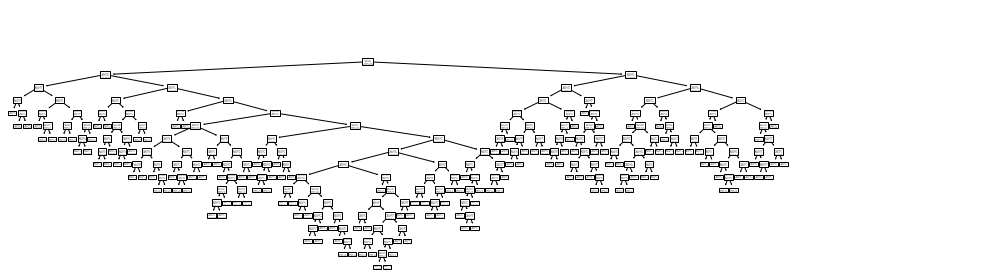

In [196]:
#Using the RandomForestClassification
from sklearn import tree

# dTree = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "random")
dTree = tree.DecisionTreeClassifier()
dTree = dTree.fit(x_training, y_training)

# To Plot the decision tree
tree.plot_tree(dTree)

<h1>5. Evaluating Model</h1>

<h5>a) Calculating the confusion Matrix</h5>

In [195]:
#Show the confusion matrix and accuracy for  the model on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_testing, dTree.predict(x_testing))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

sensitivity = (TP) / (TP + FN)
specificity = (TN) / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FN + FP)
Precision = (TP) / (TP + FP)

print('------- Confusion Matrix -----')
print(cm)
print('\n------- Metrics of Testing Model -----')
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Accuracy: ', accuracy)
print('Precision: ', Precision)

------- Confusion Matrix -----
[[210  40]
 [ 27  13]]

------- Metrics of Testing Model -----
Sensitivity:  0.325
Specificity:  0.84
Accuracy:  0.7689655172413793
Precision:  0.24528301886792453


<h5>b) Calculating Info Gain</h5>

In [118]:
# Returns importances of attributes (higher value better info gain).
importances = pd.DataFrame({'Attributes':dfModel.iloc[:, 1:dfModel.shape[1]].columns,
                            'Importance%':np.round(forest.feature_importances_,3)*100})
importances = importances.sort_values('Importance%',ascending=False).set_index('Attributes')
print('Number of attributes:', len(importances))
print('------------------------------------------')
importances

Number of attributes: 32
------------------------------------------


,Importance%
Attributes,
MonthlyIncome,6.4
Age,5.9
OverTime,5.5
EmployeeNumber,5.3
TotalWorkingYears,5.1
YearsAtCompany,4.9
MonthlyRate,4.5
HourlyRate,4.5
DistanceFromHome,4.5


<h5>c) Visualizing Info Gain</h5>

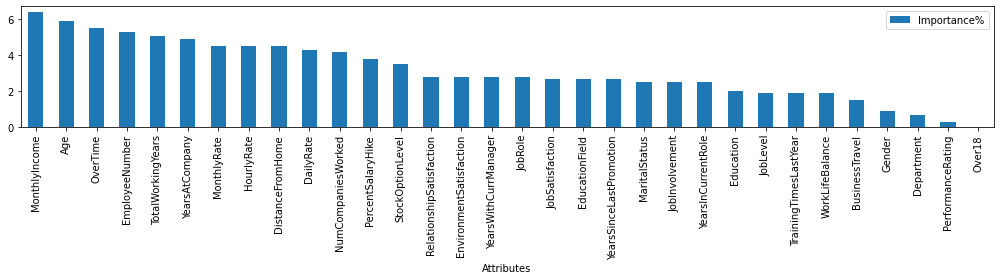

In [119]:
importances.plot.bar()